In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()
#used for getting the information about the data. this helps in identifying if there is any non null values. 
# if some if the data is missing, we are going to drop those reads. i.e dropping Nan values (not a number)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)
# takes data as input, drops non Nan values and saves the results back into data object.

In [ ]:
'''
In ML first we have to divide our data set into Features(X) and labels(Y). 
    Features - is the input variable
    Labels - Output 
    Eg) Predict if we can sell a car based on car mileage and year
        Feature - car mileage,year  / Label - yes or no (can we sell or not)

Training data set - The dataset (input) used for training purpose. 
Testing data set - the dataset used to test the trained model, whether the model is working as expected. 
        
from skilearn.model_selection import train_test_split
    The train_test_split() method is used to split our data into train and test sets.         

The dataframe created (data) will be split into (x_train, x_test, y_train, y_test)
'''


In [33]:
#Ocean_proximity  has strings but during training we cannot use the columns that has non-numeric values. 
# so we have to convert into numeric values

In [34]:
# gives the count of different values in the column ocean_proximity
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [35]:
# now we have to create a new column to represent if the location is near ocean or not. 
# get_dummies are used to indicate if the house is near ocean or not
pd.get_dummies(data.ocean_proximity)



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [38]:
# join this above dummies with the data

data = data.join(pd.get_dummies(data.ocean_proximity))

In [39]:
#In our example, house price prediction
#X (Feature/input) is all the columns except median_house_value
#Y (target/Output) is median_house_value

from sklearn.model_selection import train_test_split

#dropping ocean proximity for now, since the value of that column is string and cannot be used for trainning 
x = data.drop(['median_house_value','ocean_proximity'], axis=1) # drop method is used to remove a row or column, axis = 0 -> rows ; 1 -> column
y = data['median_house_value']

In [40]:
# Now X and y are defined, lets split x_train, x_test, y_train, y_test
# Use train_test_split, where test_size denotes the percentage of rows that needs to be used for testing.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [41]:
# lets join x_train and y_train for our training purpose now. So that now we can train the data. 
train_data = x_train.join(y_train)
#train_data.drop(['ocean_proximity'],axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
11768,-121.30,38.73,9.0,5558.0,1099.0,2717.0,1043.0,3.6455,False,True,False,False,False,139200.0
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,True,False,False,False,False,118800.0
20328,-119.09,34.24,17.0,10214.0,1589.0,3409.0,1327.0,5.3806,True,False,False,False,False,452100.0
11542,-118.02,33.75,26.0,2989.0,479.0,1596.0,475.0,5.7157,True,False,False,False,False,231200.0
8465,-118.34,33.91,8.0,3937.0,1404.0,2691.0,1142.0,2.4741,True,False,False,False,False,185700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,-118.27,34.06,26.0,513.0,338.0,1204.0,321.0,1.4904,True,False,False,False,False,275000.0
3668,-118.39,34.23,18.0,3405.0,831.0,3001.0,795.0,3.0083,True,False,False,False,False,181900.0
4461,-118.18,34.10,7.0,2529.0,689.0,1215.0,577.0,4.7853,True,False,False,False,False,153100.0
16808,-122.41,37.66,37.0,694.0,188.0,658.0,225.0,4.6103,False,False,False,False,True,237500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

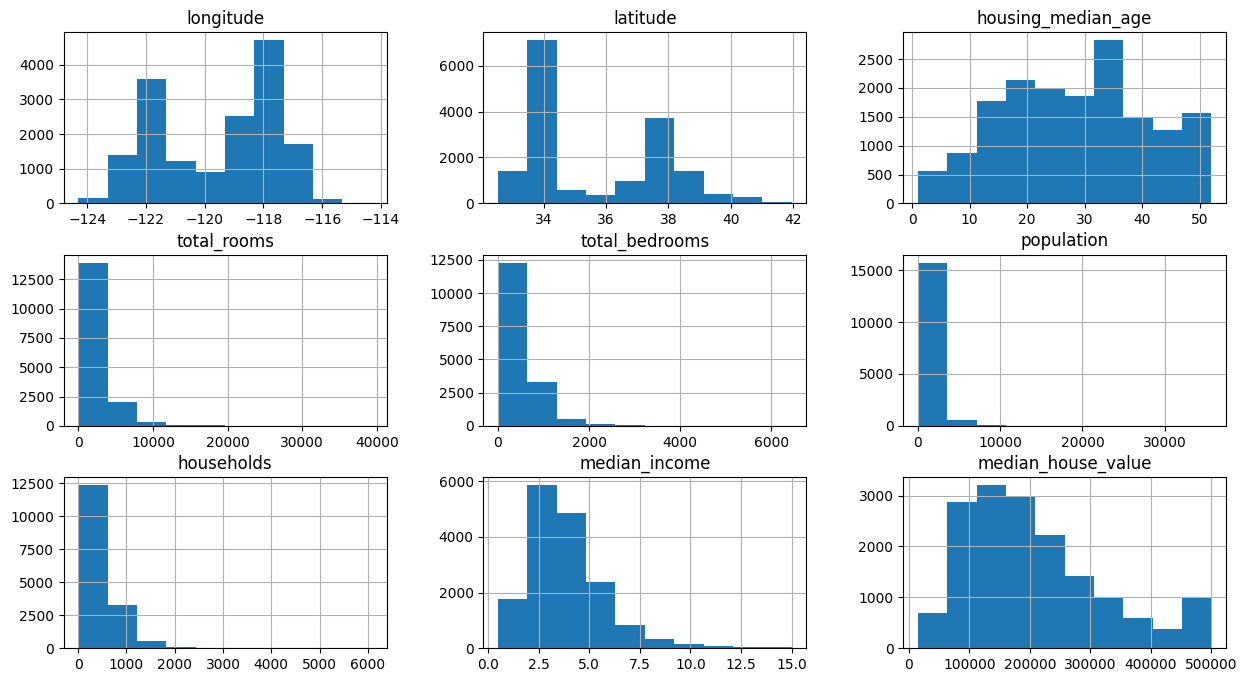

In [42]:
train_data.hist(figsize=(15,8)) 
# used to get histograms( graphical representation - frequency of the data)
#(figsize -> tuple containing width and height)

# similarly, we can do some operations like co-relation with target(Y) to train the data

In [46]:
train_data.corr()
# provides the correlation matrix. thats gives the relationship between other columns
# how is correlation calculated
#        The matrix is a table in which every cell contains a correlation coefficient, 
#        1 is considered a strong relationship between variables, 
#        0 a neutral relationship 
#        -1 a not strong relationship.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924178,-0.105220,0.040931,0.065795,0.095326,0.052470,-0.018118,0.324368,-0.061603,0.010687,-0.473655,0.048631,-0.043188
latitude,-0.924178,1.000000,0.007922,-0.030930,-0.061539,-0.104715,-0.067104,-0.078025,-0.451113,0.357181,-0.018658,0.357237,-0.162767,-0.147405
housing_median_age,-0.105220,0.007922,1.000000,-0.359428,-0.320327,-0.291798,-0.302497,-0.116554,0.047399,-0.238017,0.019121,0.257426,0.018434,0.109051
total_rooms,0.040931,-0.030930,-0.359428,1.000000,0.931231,0.854444,0.918413,0.196279,-0.010191,0.029970,-0.008515,-0.021300,-0.006183,0.133207
total_bedrooms,0.065795,-0.061539,-0.320327,0.931231,1.000000,0.876321,0.979129,-0.008593,0.010765,-0.002238,-0.004861,-0.016757,0.003136,0.049050
population,0.095326,-0.104715,-0.291798,0.854444,0.876321,1.000000,0.906006,0.004117,0.070075,-0.021014,-0.011669,-0.059342,-0.018500,-0.025352
households,0.052470,-0.067104,-0.302497,0.918413,0.979129,0.906006,1.000000,0.012494,0.035701,-0.035518,-0.010221,-0.007975,0.004500,0.064750
median_income,-0.018118,-0.078025,-0.116554,0.196279,-0.008593,0.004117,0.012494,1.000000,0.167660,-0.237865,-0.010403,0.057291,0.029201,0.689997
<1H OCEAN,0.324368,-0.451113,0.047399,-0.010191,0.010765,0.070075,0.035701,0.167660,1.000000,-0.609427,-0.015590,-0.314978,-0.340494,0.257767
INLAND,-0.061603,0.357181,-0.238017,0.029970,-0.002238,-0.021014,-0.035518,-0.237865,-0.609427,1.000000,-0.011961,-0.241670,-0.261247,-0.486279


'\nSome points to note from below diagram.\n    1. We are trying to find the relationship with the target (media_house_value)\n    2. We can see latitude is less related with median_house_value(-0.92)\n    3. Median_income is closely related with the median_house_value\n\nQuestion:\n    Please check how is this correlation value created. \n'

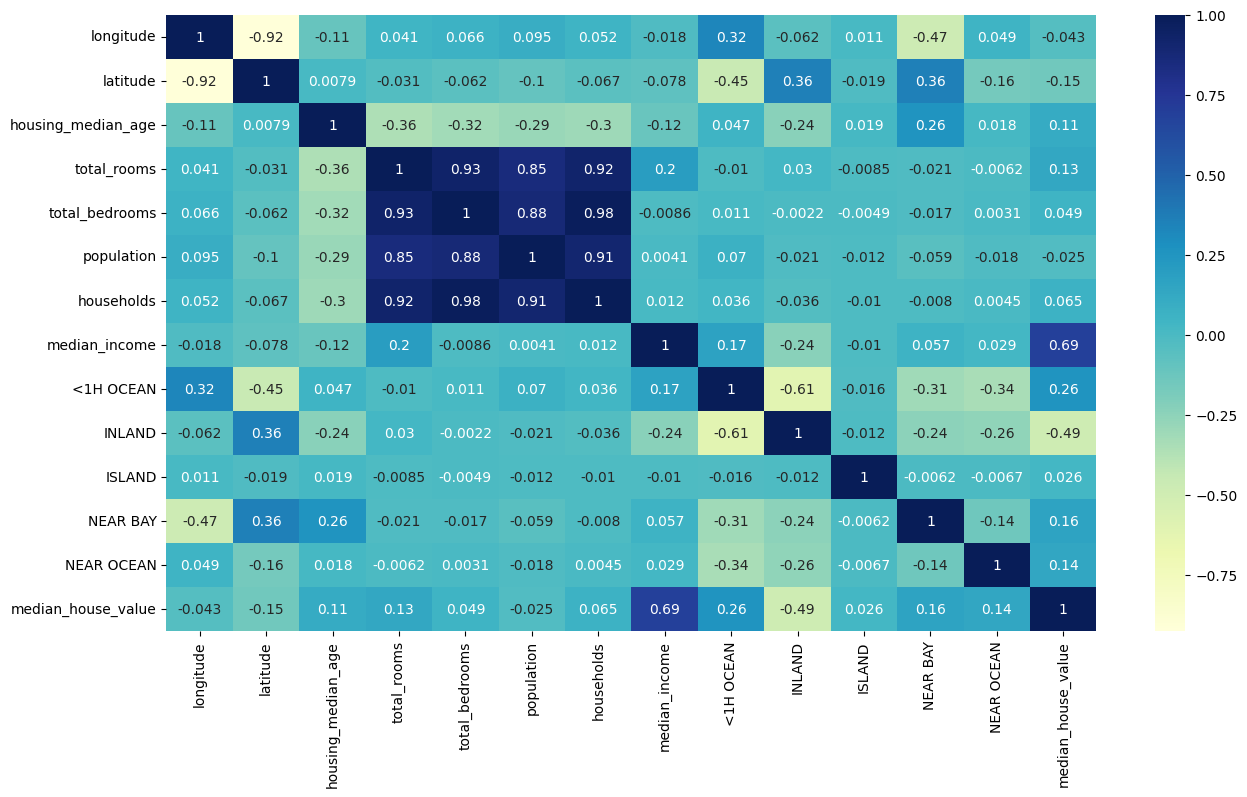

In [47]:
plt.figure(figsize=(15,8)) # size of the image
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
# produces correlation heat map; heat map is a way to visualize data. 
# It shows (correlation) relationship betweemn variables(columns)
#annot = True; displays the value in the image itself ; cmap - colormap "yellow greenblue"

'''
Some points to note from below diagram.
    1. We are trying to find the relationship with the target (media_house_value)
    2. We can see latitude is less related with median_house_value(-0.92)
    3. Median_income is closely related with the median_house_value

Question:
    Please check how is this correlation value created. 
'''

In [ ]:
# Lets perform some Data Preprocessing (Cleaning of data)
'''
From histogram graph, we can see some of the columns are leaned towards one side. Skewed data
Eg total_rooms, total_bedrooms, population, households.
So we are going to take the logarithm of those feature. 
'''

# Log normalization - https://campus.datacamp.com/courses/preprocessing-for-machine-learning-in-python/standardizing-data?ex=4
# Log normalization is a method for standardizing data that can be useful when we have features with high variance.
'''
1. Used when features has high variance.  
    Variance -> Determines how far is each number from its mean 
2. We take natural log with each number. 
Eg -> log(30) = 3.4 (e^3.4)


How do you log transform right skewed data?
x'=log(x+1) 
-often used for transforming data that are right-skewed, but also include zero values. 
-note that the shape of the resulting distribution will depend on how big x is compared to the constant 1.
Therefore the shape of the resulting distribution depends on the units in which x was measured.

Question:
1. Can't we used skewed data directly without log normalization?
'''

In [48]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

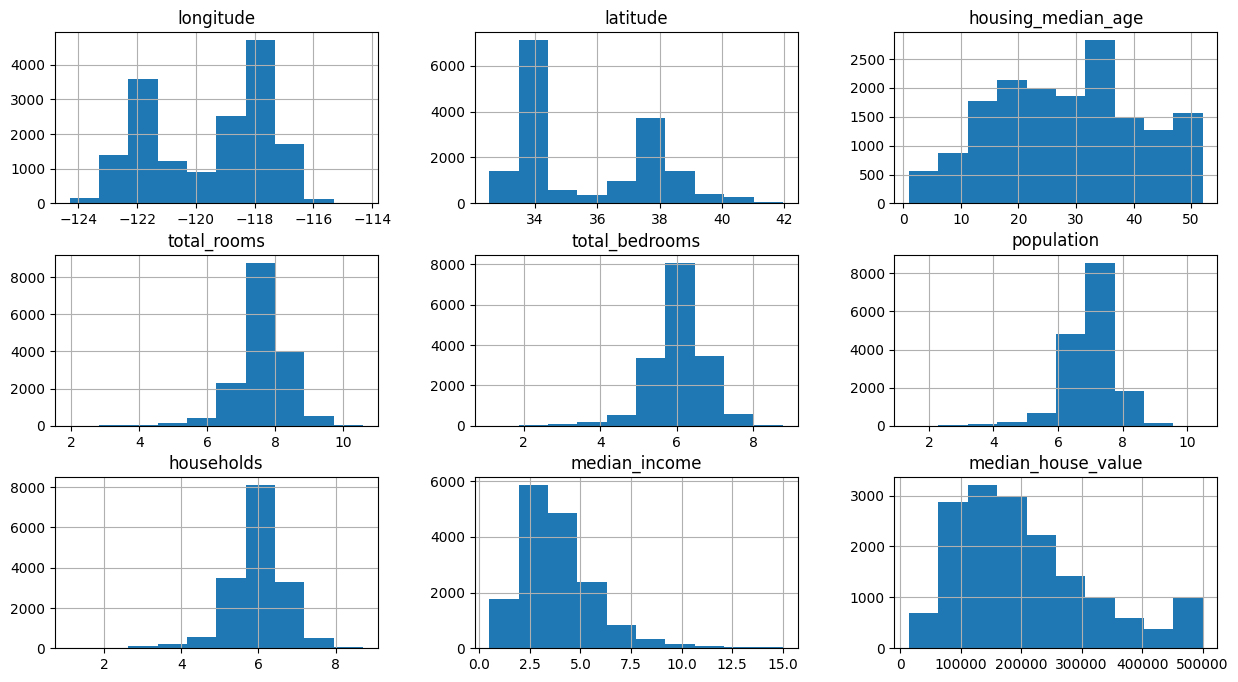

In [49]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

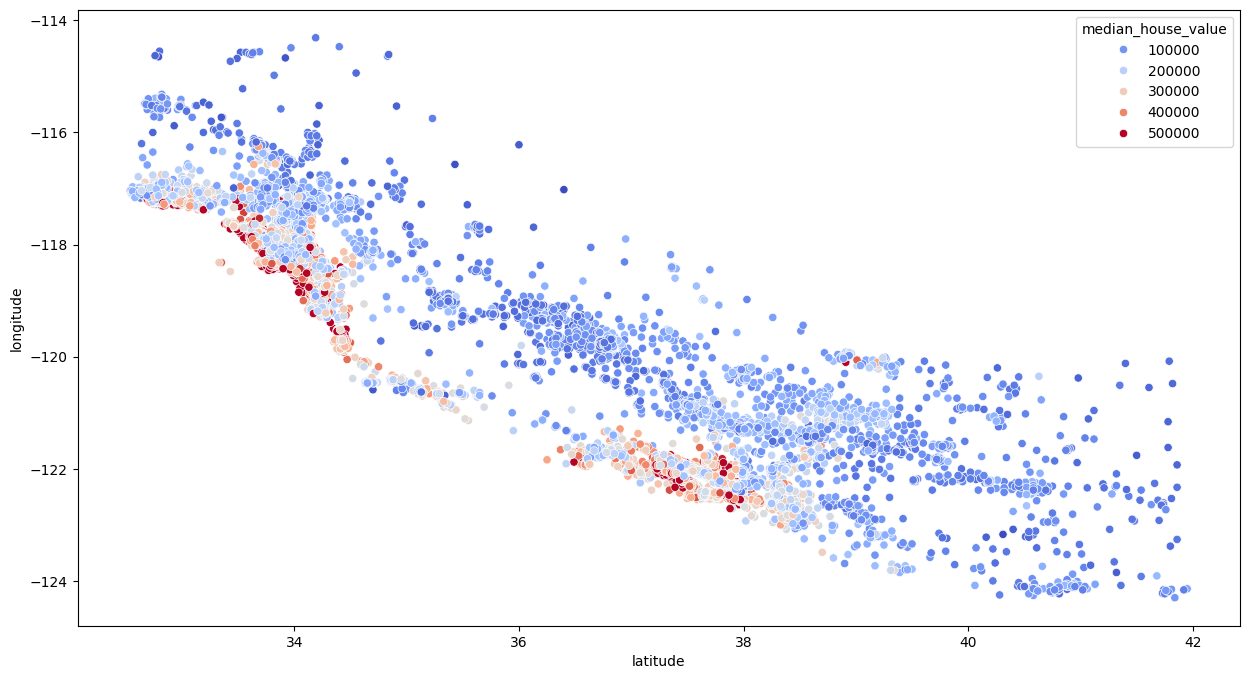

In [51]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data = train_data, hue="median_house_value", palette="coolwarm")

In [52]:
#Feature Engineering -> Finding new features which can be more related with the output.
# Below are 2 examples 

# find how many rooms are bedrooms
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
#find how many rooms per households

train_data['household_rooms'] = train_data['total_rooms']/train_data['households']


<Axes: >

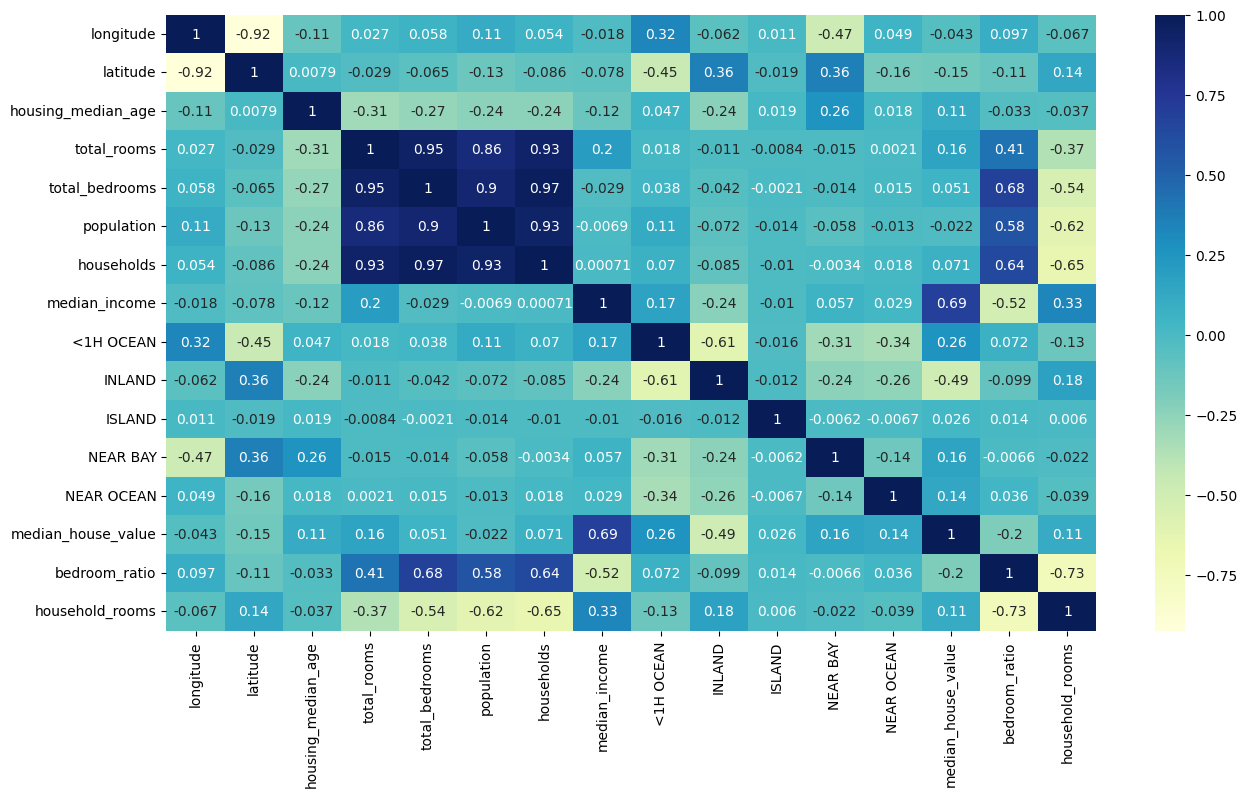

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
# We are going to use linear regression to train a model here. 
'''
Linear regression is a linear model, 
e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).
More specifically, that y can be calculated from a linear combination of the input variables (x).
'''

In [54]:
from sklearn.linear_model import LinearRegression

# we have joined our (x,y) with train_data to find the correlation. So we have to split it again. 

x_train, y_train = train_data.drop("median_house_value", axis= 1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train,y_train)

#Question: How does linearRegression interally works

LinearRegression()

In [56]:
# Do the same preprocessing for test_data as well. 

test_data = x_test.join(y_test)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
11794,-121.18,38.83,15.0,4488.0,859.0,2114.0,805.0,2.9484,False,True,False,False,False,124400.0
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,True,False,False,False,False,118800.0
1245,-122.04,39.22,27.0,1446.0,295.0,670.0,281.0,3.2625,False,True,False,False,False,92800.0
10256,-117.87,33.88,28.0,2612.0,602.0,1682.0,563.0,3.6417,True,False,False,False,False,204300.0
8177,-118.09,33.80,36.0,1724.0,322.0,838.0,328.0,4.4831,True,False,False,False,False,253900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846,-118.31,34.02,52.0,1173.0,284.0,814.0,295.0,2.4500,True,False,False,False,False,111400.0
3929,-118.55,34.19,31.0,1856.0,370.0,990.0,360.0,4.3654,True,False,False,False,False,223800.0
19401,-120.95,37.73,12.0,3609.0,712.0,2650.0,742.0,2.8565,False,True,False,False,False,92700.0
10004,-121.06,39.04,14.0,1651.0,279.0,633.0,261.0,4.2802,False,True,False,False,False,194800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

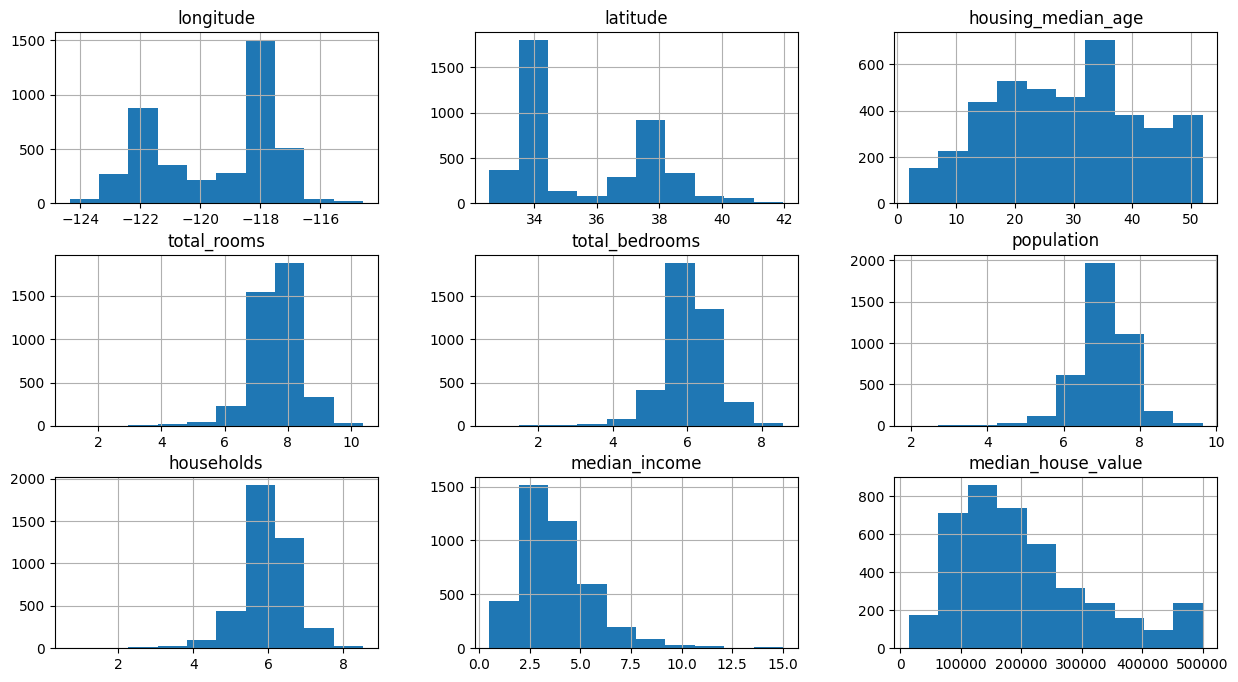

In [57]:
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data.hist(figsize=(15,8))

In [58]:
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']

test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

<Axes: >

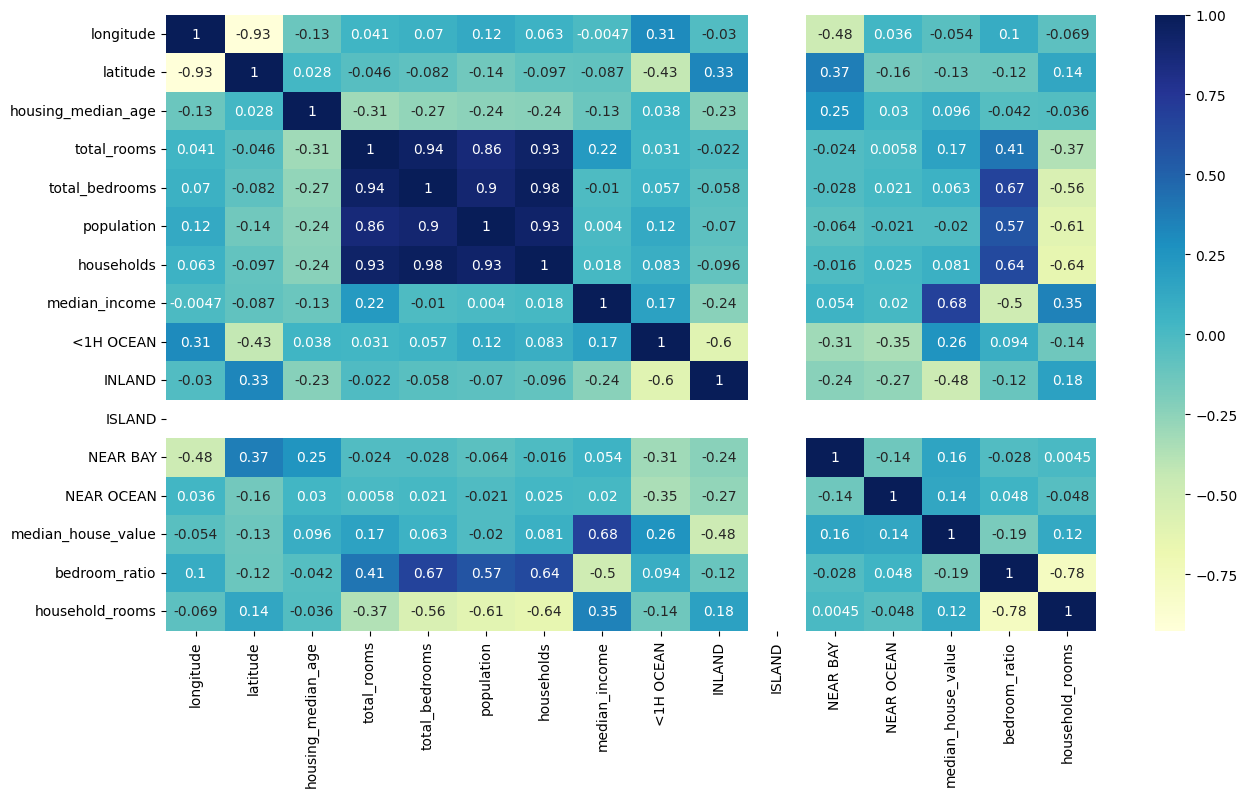

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(test_data.corr(),annot=True,cmap="YlGnBu")

In [64]:
x_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [65]:
#score method to determine his model accuracy 

reg.score(x_test,y_test)

0.6555245635131652

In [66]:
# we have to scale the input before training; not the output

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train_s = scalar.fit_transform(x_train)

reg.fit(x_train_s,y_train)

LinearRegression()

In [69]:
x_test_s = scalar.fit_transform(x_test)

reg.score(x_test_s,y_test)


0.6549208569868674

In [72]:
# We are going to use more optimized model now. 
#Random Forest model 
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [73]:
forest.score(x_test,y_test)

0.8064014160317758

In [ ]:
# we can still increase the accuracy but providing the paramaters using cross validation. 

'''

The purpose of cross–validation is to test the ability of a machine learning model to predict new data.
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available 
input data and evaluating them on the complementary subset of the data.


We take the input, split into subsets for training and one for testing
Eg, If we split our input into 10 subsets, we use 9 for training and 1 for evaluation.
'''


'''
GridSearch CV - 
Parameters of GridSearchCV
===========================
1.estimator: Pass the model instance for which you want to check the hyperparameters. (random Forest)
2.params_grid: the dictionary object that holds the hyperparameters you want to try
3.scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
    neg-mean-scored-error: ?
4.cv: number of cross-validation you have to try for each selected set of hyperparameters 
5.verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6.n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. 


'''

In [77]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

#n_estimators is the number of trees/records to be used in the forest.
#max_features on the other hand, determines the maximum number of features to consider while looking for a split. 

# we can provide different values to find the best estimator 
param_grid = {
    "n_estimators" : [3,10,30], 
    "max_features" : [2,4,6,8]
}

gridsearch = GridSearchCV(forest, param_grid, scoring="neg_mean_squared_error",cv=5,return_train_score=True)

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
# to check which parameters provides the best results

best_forest = gridsearch.best_estimator_
best_forest

RandomForestRegressor(max_features=8, n_estimators=30)

In [83]:
best_forest.score(x_test,y_test)

0.8092549962094922